<a href="https://colab.research.google.com/github/ARAVINDSHANKAR12/Resume_Screening/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

resumeDataSet = pd.read_csv('/content/LargeResumeDataSet.csv' ,encoding='utf-8')
resumeDataSet['cleaned_resume'] = ''
resumeDataSet.head()

,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,Scrum Master,NaN,Problem-Solving,Cybersecurity,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,0-2 years,Master's,AWS Certified,NaN,Teamwork,Machine Learning,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",3-5 years,PhD,Scrum Master,NaN,Problem-Solving,Machine Learning,
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0-2 years,Master's,Google Data Analytics,"JavaScript, HTML",Teamwork,Cybersecurity,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",0-2 years,Master's,Scrum Master,"Python, SQL",Leadership,Cloud Computing,


In [ ]:
resumeDataSet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               2000 non-null   object
 1   Resume                 2000 non-null   object
 2   Experience             2000 non-null   object
 3   Education              2000 non-null   object
 4   Certifications         1599 non-null   object
 5   Programming Languages  1613 non-null   object
 6   Soft Skills            2000 non-null   object
 7   Technical Skills       2000 non-null   object
 8   cleaned_resume         2000 non-null   object
dtypes: object(9)
memory usage: 140.8+ KB


In [ ]:
print ("Displaying the distinct categories of resume:\n\n ")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume:

 
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


Category
Java Developer               135
Testing                      109
Web Designing                102
DevOps Engineer               94
Python Developer              92
Sales                         91
Data Science                  82
Database                      80
Automation Testing            78
Mechanical Engineer           77
Hadoop                        77
Electrical Engineering        76
Operations Manager            76
Blockchain                    75
ETL Developer                 74
PMO                           73
Health and fitness            73
Advocate                      72
HR                            71
Business Analyst              71
Civil Engineer                67
Network Security Engineer     66
Arts                          65
DotNet Developer              65
SAP Developer                 59
Name: count, dtype: int64


Index(['Category', 'Resume', 'Experience', 'Education', 'Certifications',
       'Programming Languages', 'Soft Skills', 'Technical Skills'],
      dtype='object')


<ipython-input-30-96340ad0c88c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Category", data=resumeDataSet, palette="coolwarm", edgecolor="black")


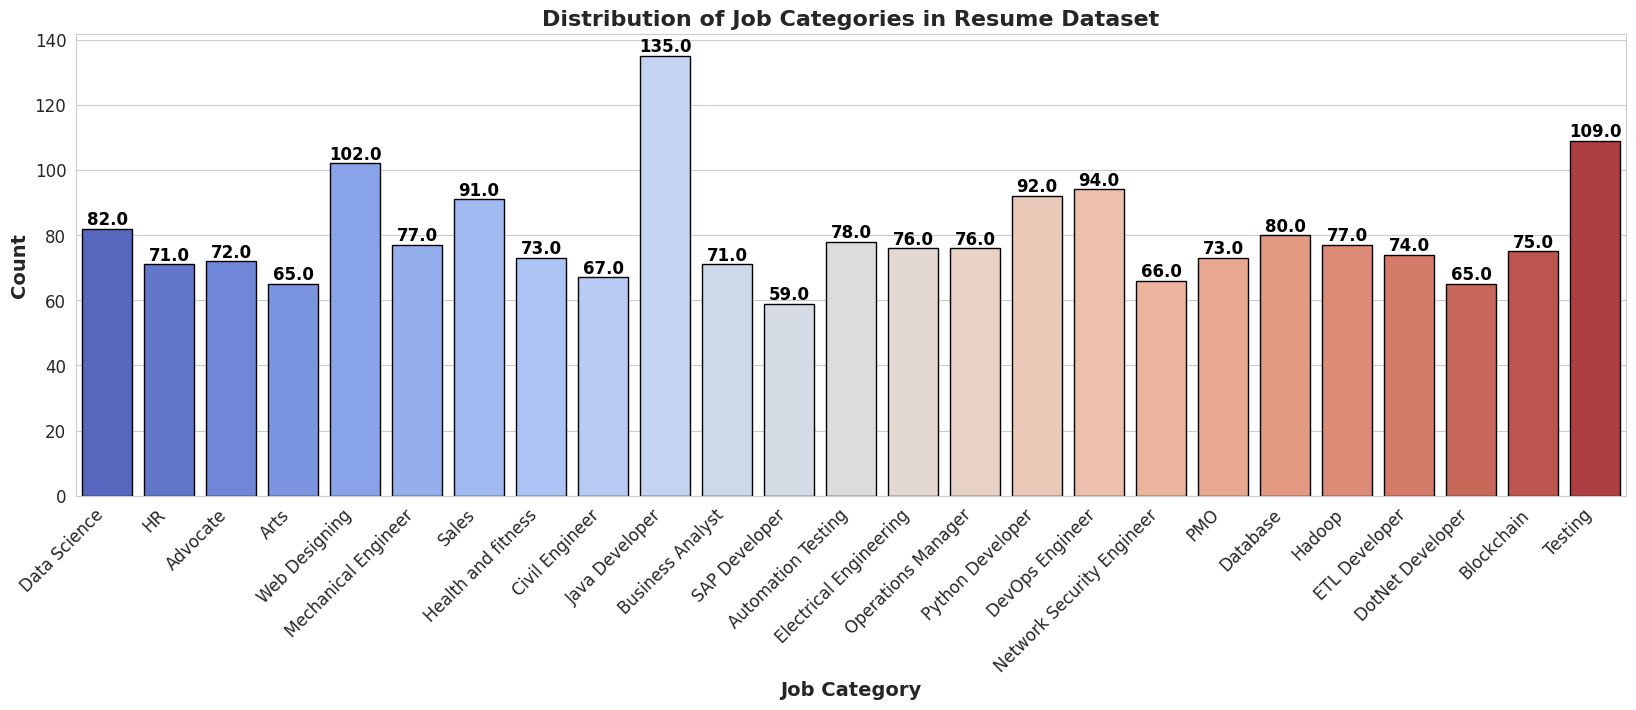

In [ ]:
import pandas as pd

# Load dataset (update path as needed)
resumeDataSet = pd.read_csv("/content/LargeResumeDataSet.csv")  # Ensure the file is available in the environment
print(resumeDataSet.columns)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(20, 6))
ax = sns.countplot(x="Category", data=resumeDataSet, palette="coolwarm", edgecolor="black")

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Job Category", fontsize=14, fontweight='bold')
plt.ylabel("Count", fontsize=14, fontweight='bold')
plt.title("Distribution of Job Categories in Resume Dataset", fontsize=16, fontweight='bold')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


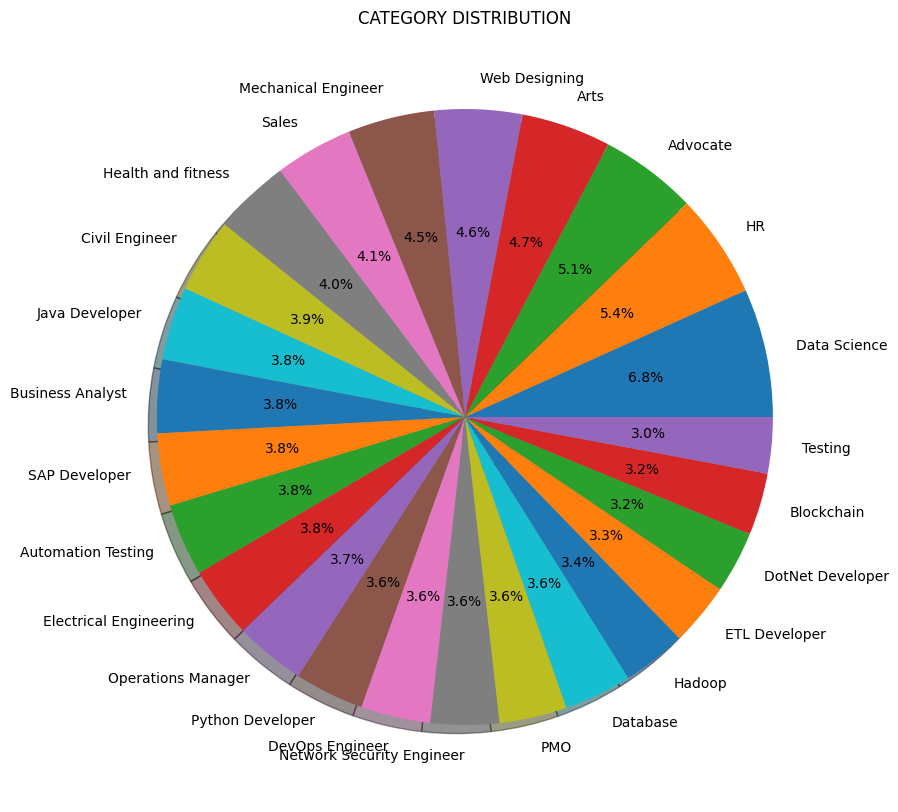

In [ ]:
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()


In [ ]:
resumeDataSet.duplicated(subset=['Resume']).value_counts()

,count
True,1833
False,167


In [ ]:
resumeDataSet[resumeDataSet.duplicated()==True]


,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume


In [ ]:
resumeDataSet.iloc[10]['Resume']

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
resumeDataSet[resumeDataSet['Resume']=='Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigations and Dispute Services   Assurance\r\nTECHNOLOGY ASSISTED REVIEW\r\nTAR (Technology Assisted Review) assists in accelerating the review process and run analytics and generate reports.\r\n* Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain, this tool implements predictive coding and topic modelling by automating reviews, resulting in reduced labor costs and time spent during the lawyers review.\r\n* Understand the end to end flow of the solution, doing research and development for classification models, predictive analysis and mining of the information present in text data. Worked on analyzing the outputs and precision monitoring for the entire tool.\r\n* TAR assists in predictive coding, topic modelling from the evidence by following EY standards. Developed the classifier models in order to identify "red flags" and fraud-related issues.\r\n\r\nTools & Technologies: Python, scikit-learn, tfidf, word2vec, doc2vec, cosine similarity, NaÃ¯ve Bayes, LDA, NMF for topic modelling, Vader and text blob for sentiment analysis. Matplot lib, Tableau dashboard for reporting.\r\n\r\nMULTIPLE DATA SCIENCE AND ANALYTIC PROJECTS (USA CLIENTS)\r\nTEXT ANALYTICS - MOTOR VEHICLE CUSTOMER REVIEW DATA * Received customer feedback survey data for past one year. Performed sentiment (Positive, Negative & Neutral) and time series analysis on customer comments across all 4 categories.\r\n* Created heat map of terms by survey category based on frequency of words * Extracted Positive and Negative words across all the Survey categories and plotted Word cloud.\r\n* Created customized tableau dashboards for effective reporting and visualizations.\r\nCHATBOT * Developed a user friendly chatbot for one of our Products which handle simple questions about hours of operation, reservation options and so on.\r\n* This chat bot serves entire product related questions. Giving overview of tool via QA platform and also give recommendation responses so that user question to build chain of relevant answer.\r\n* This too has intelligence to build the pipeline of questions as per user requirement and asks the relevant /recommended questions.\r\n\r\nTools & Technologies: Python, Natural language processing, NLTK, spacy, topic modelling, Sentiment analysis, Word Embedding, scikit-learn, JavaScript/JQuery, SqlServer\r\n\r\nINFORMATION GOVERNANCE\r\nOrganizations to make informed decisions about all of the information they store. The integrated Information Governance portfolio synthesizes intelligence across unstructured data sources and facilitates action to ensure organizations are best positioned to counter information risk.\r\n* Scan data from multiple sources of formats and parse different file formats, extract Meta data information, push results for indexing elastic search and created customized, interactive dashboards using kibana.\r\n* Preforming ROT Analysis on the data which give information of data which helps identify content that is either Redundant, Outdated, or Trivial.\r\n* Preforming full-text search analysis on elastic search with predefined methods which can tag as (PII) personally identifiable information (social security numbers, addresses, names, etc.) which frequently targeted during cyber-attacks.\r\nTools & Technologies: Python, Flask, Elastic Search, Kibana\r\n\r\nFRAUD ANALYTIC PLATFORM\r\nFraud Analytics and investigative platform to review all red flag cases.\r\nâ\x80¢ FAP is a Fraud Analytics and investigative platform with inbuilt case manager and suite of Analytics for various ERP systems.\r\n* It can be used by clients to interrogate their Accounting systems for identifying the anomalies which can be indicators of fraud by running advanced analytics\r\nTools & Technologies: HTML, JavaScript, SqlServer, JQuery, CSS, Bootstrap, Node.js, D3.js, DC.js']

,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,Scrum Master,NaN,Problem-Solving,Cybersecurity,
10,Data Science,Skills * Programming Languages: Python (pandas...,0-2 years,Diploma,AWS Certified,"JavaScript, HTML",Time Management,Cloud Computing,
20,Data Science,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,PMP,"Python, SQL",Communication,Machine Learning,
30,Data Science,Skills * Programming Languages: Python (pandas...,10+ years,Bachelor's,AWS Certified,"JavaScript, HTML",Teamwork,Cybersecurity,


In [ ]:
resumeDataSet.drop_duplicates(subset=['Resume'], keep='first',inplace = True)
resumeDataSet.reset_index(inplace=True,drop=True)
resumeDataSet.head()

,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,Scrum Master,NaN,Problem-Solving,Cybersecurity,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,0-2 years,Master's,AWS Certified,NaN,Teamwork,Machine Learning,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",3-5 years,PhD,Scrum Master,NaN,Problem-Solving,Machine Learning,
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0-2 years,Master's,Google Data Analytics,"JavaScript, HTML",Teamwork,Cybersecurity,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",0-2 years,Master's,Scrum Master,"Python, SQL",Leadership,Cloud Computing,


In [ ]:
resumeDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               167 non-null    object
 1   Resume                 167 non-null    object
 2   Experience             167 non-null    object
 3   Education              167 non-null    object
 4   Certifications         139 non-null    object
 5   Programming Languages  132 non-null    object
 6   Soft Skills            167 non-null    object
 7   Technical Skills       167 non-null    object
 8   cleaned_resume         167 non-null    object
dtypes: object(9)
memory usage: 11.9+ KB


In [ ]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))

In [ ]:
resumeDataSet.head()

,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,Scrum Master,NaN,Problem-Solving,Cybersecurity,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,0-2 years,Master's,AWS Certified,NaN,Teamwork,Machine Learning,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",3-5 years,PhD,Scrum Master,NaN,Problem-Solving,Machine Learning,Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0-2 years,Master's,Google Data Analytics,"JavaScript, HTML",Teamwork,Cybersecurity,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",0-2 years,Master's,Scrum Master,"Python, SQL",Leadership,Cloud Computing,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeDataSet_d=resumeDataSet.copy()

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 616), ('company', 520), ('months', 515), ('Details', 510), ('description', 458), ('1', 348), ('Project', 299), ('data', 242), ('project', 231), ('6', 227), ('Maharashtra', 217), ('year', 215), ('SQL', 215), ('team', 207), ('Less', 199), ('using', 197), ('January', 189), ('Skill', 175), ('Management', 167), ('Ltd', 159), ('Pune', 158), ('C', 151), ('Education', 144), ('management', 143), ('Data', 140), ('Developer', 137), ('Engineering', 134), ('database', 133), ('Java', 130), ('Database', 127), ('monthsCompany', 125), ('System', 123), ('University', 123), ('Server', 123), ('Pvt', 122), ('India', 120), ('like', 118), ('The', 117), ('Responsibilities', 117), ('various', 116), ('A', 113), ('business', 113), ('2', 113), ('development', 112), ('reports', 111), ('application', 110), ('issues', 106), ('system', 106), ('Mumbai', 106), ('Test', 105)]


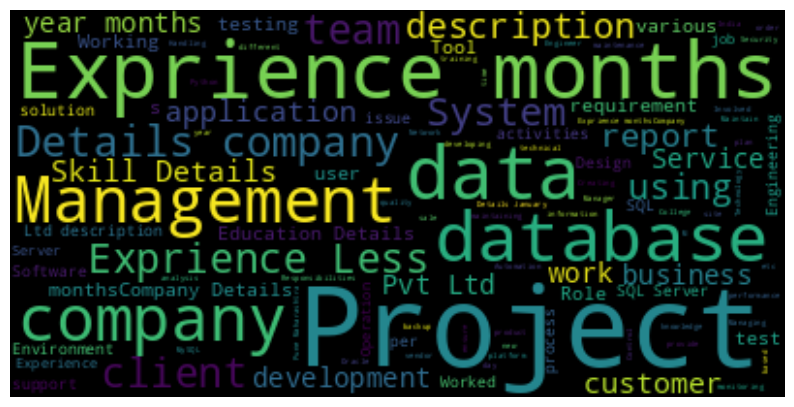

In [ ]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
resumeDataSet.head()

,Category,Resume,Experience,Education,Certifications,Programming Languages,Soft Skills,Technical Skills,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,3-5 years,Master's,Scrum Master,NaN,Problem-Solving,Cybersecurity,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,0-2 years,Master's,AWS Certified,NaN,Teamwork,Machine Learning,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",3-5 years,PhD,Scrum Master,NaN,Problem-Solving,Machine Learning,Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,0-2 years,Master's,Google Data Analytics,"JavaScript, HTML",Teamwork,Cybersecurity,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",0-2 years,Master's,Scrum Master,"Python, SQL",Leadership,Cloud Computing,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
resumeDataSet.Category.value_counts()

,count
Category,
15,13
7,11
12,11
6,10
0,10
9,7
13,7
8,7
2,7


In [ ]:
resumeDataSet_d.Category.value_counts() #understanding decode LabelEncoder

,count
Category,
Java Developer,13
Database,11
HR,11
Data Science,10
Advocate,10
DotNet Developer,7
Hadoop,7
DevOps Engineer,7
Automation Testing,7


In [ ]:
del resumeDataSet_d #clearing the space occupied
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)


Feature completed .....
(133, 7351)
(34, 7351)


In [ ]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.88
Accuracy of KNeighbors Classifier on test set:     0.82


In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train, clf.predict(X_train))))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.40      0.57         5
           2       0.71      0.83      0.77         6
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       0.90      1.00      0.95         9
           8       1.00      0.17      0.29         6
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         4
          11       0.67      1.00      0.80         4
          12       1.00      0.67      0.80         9
          13       1.00      1.00      1.00         5
          14       0.83      1.00      0.91         5
          15       0.91      1.00      0.

In [ ]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       0.75      1.00      0.

In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Load dataset (modify if using a different dataset)
df = pd.read_csv("/content/LargeResumeDataSet.csv")  # Replace with actual dataset file

# Assume 'Resume' column contains text data, and 'Category' column contains labels
X = df["Resume"]
y = df["Category"]

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a model (using Naive Bayes as an example)
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [ ]:
# Save the trained model
with open('resume_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [ ]:
# Load the trained model & vectorizer
with open('resume_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    tfidf_vectorizer = pickle.load(vectorizer_file)

# List of job categories (modify based on your dataset)
job_categories = df["Category"].unique()

def predict_job_role(user_input):
    """Classifies the job role based on user-provided skills."""
    input_features = tfidf_vectorizer.transform([user_input])  # Transform user input
    prediction = model.predict(input_features)  # Predict the job category
    return prediction[0]  # Return the predicted category

# Take dynamic input from user
user_skills = input("Enter your skills (comma-separated): ")
predicted_job = predict_job_role(user_skills)

# Display the predicted job role
print(f"\n🔹 Based on your skills, the best job role for you is: **{predicted_job}**")


Enter your skills (comma-separated): python, deeplearning ,excel

🔹 Based on your skills, the best job role for you is: **Python Developer**


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 50.00%


In [ ]:
from sklearn.metrics import classification_report

# Print detailed evaluation metrics
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      0.22      0.36         9
                     Arts       1.00      0.42      0.59        19
       Automation Testing       1.00      0.30      0.46        20
               Blockchain       1.00      0.64      0.78        14
         Business Analyst       1.00      0.55      0.71        11
           Civil Engineer       1.00      0.67      0.80        12
             Data Science       1.00      0.33      0.50        12
                 Database       1.00      0.19      0.32        16
          DevOps Engineer       1.00      0.67      0.80        18
         DotNet Developer       1.00      0.31      0.47        13
            ETL Developer       1.00      0.37      0.54        19
   Electrical Engineering       1.00      0.42      0.59        12
                       HR       1.00      0.68      0.81        19
                   Hadoop       1.00      0.77      0.87     

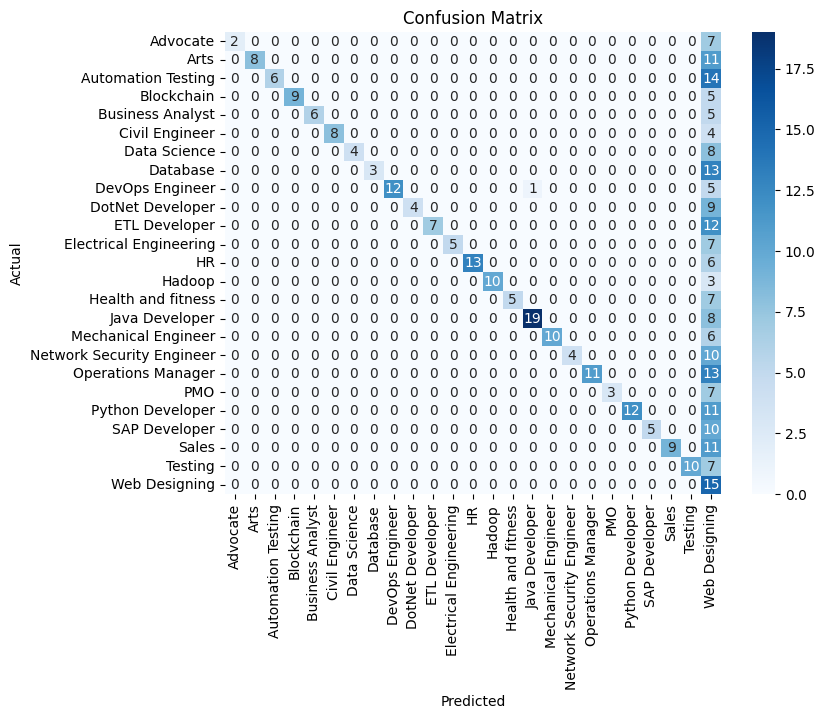

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import numpy as np

# Get top words from TF-IDF
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
sorted_coeffs = np.argsort(np.mean(X_train.toarray(), axis=0))[-10:]

print("Top 10 Important Words for Prediction:")
print(feature_names[sorted_coeffs])


Top 10 Important Words for Prediction:
['company' 'months' 'details' 'exprience' 'skills' 'experience' 'relevant'
 'generated' 'text' 'resume']


In [ ]:
# Train the Naïve Bayes model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = model.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.50
Testing Accuracy: 0.50
